# Agglomerative clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [ ]:
#random dataset
x = np.array([[1,2],[1,4],[1,0],[4,2],[4,4],[4,0]])
#algorithm
clustering = AgglomerativeClustering(n_clusters = 2).fit(x)
print(clustering.labels_)

[1 1 1 0 0 0]


In [ ]:
#perform hierarchical clustering
z = linkage(x, 'ward')

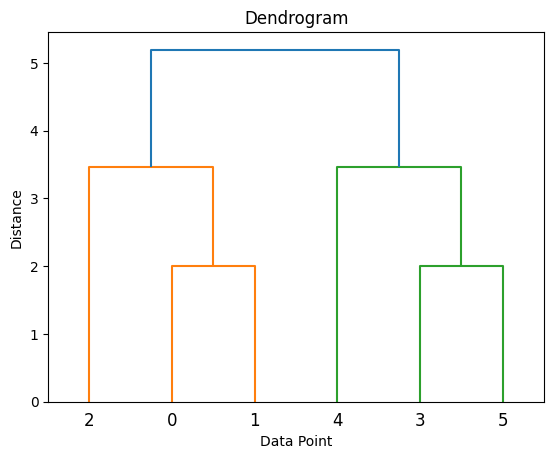

In [ ]:
#dendrogram
dendrogram(z)
plt.title("Dendrogram")
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()

# PCA

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import load_breast_cancer
#loading the dataset
data = load_breast_cancer()
data.keys()
print(data['target_names'])
print(data['feature_names'])

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
#dataframe creation
df = pd.DataFrame(data['data'], columns = data['feature_names'])

In [ ]:
#scaling the data
scale = StandardScaler()
scale.fit(df)
scaled_data = scale.transform(df)
#pca
principal = PCA(n_components = 3)
principal.fit(scaled_data)

PCA(n_components=3)

In [ ]:
x = principal.transform(scaled_data)
#checking the dimensions
print(x.shape)

(569, 3)


In [ ]:
#eigen values and eigen vectors produced by principal components
principal.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.23271589,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825723,  0.14188335,  0.27533947],
       [-0.00853123,  0.06454989, -0.00931421,  0.02869953, -0.10429181,
        -0.07409155,  0.00273379, -0.02556361, -0

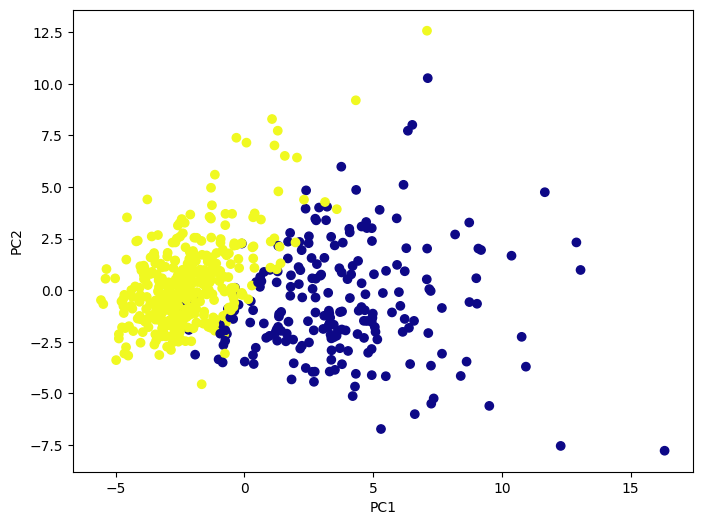

In [ ]:
# plot
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1],c=data['target'],cmap='plasma')
# labeling x and y axes
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
#variance
principal.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291015])

# K means

In [ ]:
#import necessary library
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
#load the dataset
df = pd.read_json('https://raw.githubusercontent.com/PawanKrGunjan/Natural-Language-Processing/main/Sarcasm%20Detection/sarcasm.json')
df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [ ]:
#extracting the sentences only
sentence = df.headline

In [ ]:
#create vectorizer
vectorizer = TfidfVectorizer(stop_words = 'english')

In [ ]:
#vectorizing the text documents
vectorized_doc = vectorizer.fit_transform(sentence)

In [ ]:
#reducing the dimensionality
pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(vectorized_doc.toarray())

In [ ]:
#clustering the documents using k means
num_clusters = 2
kmeans = KMeans(n_clusters = num_clusters, n_init = 5, max_iter = 500, random_state = 42)
kmeans.fit(vectorized_doc)

KMeans(max_iter=500, n_clusters=2, n_init=5, random_state=42)

In [ ]:
#dataframe to store results
res = pd.DataFrame()
res['document'] = sentence
res['cluster'] = kmeans.labels_
pd.set_option('display.max_rows', None)
print(res)

                                                document  cluster
0      former versace store clerk sues over secret 'b...        0
1      the 'roseanne' revival catches up to our thorn...        0
2      mom starting to fear son's web series closest ...        0
3      boehner just wants wife to listen, not come up...        0
4      j.k. rowling wishes snape happy birthday in th...        0
5                            advancing the world's women        0
6         the fascinating case for eating lab-grown meat        0
7      this ceo will send your kids to school, if you...        0
8      top snake handler leaves sinking huckabee camp...        0
9      friday's morning email: inside trump's presser...        1
10     airline passengers tackle man who rushes cockp...        0
11     facebook reportedly working on healthcare feat...        0
12     north korea praises trump and urges us voters ...        1
13     actually, cnn's jeffrey lord has been 'indefen...        0
14     bar

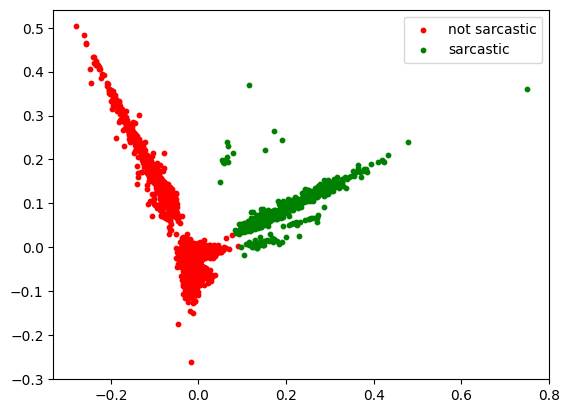

In [ ]:
#plotting the results
colors = ['red', 'green']
cluster = ['not sarcastic', 'sarcastic']
for i in range(num_clusters):
  plt.scatter(reduced_data[kmeans.labels_ == i, 0],
              reduced_data[kmeans.labels_ == i, 1],
              s=10, color = colors[i], label = f'{cluster[i]}')
plt.legend()
plt.show()